# Milk Quality Prediction with Machine Learning (Classification)

### Data Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
milkdata = pd.read_csv("csv/milknew.csv")

In [3]:
milkdata.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
milkdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [5]:
milkdata.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [6]:
milkdata.shape

(1059, 8)

In [7]:
milkdata.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [11]:
milkdata.describe(include = ['O']).T

,count,unique,top,freq
Grade,1059,3,low,429


### Data Cleaning

In [12]:
milkdata['Grade'].unique()

array(['high', 'low', 'medium'], dtype=object)

In [13]:
milkdata.nunique()

pH            16
Temprature    17
Taste          2
Odor           2
Fat            2
Turbidity      2
Colour         9
Grade          3
dtype: int64

In [10]:
milkdata.isna().any()

pH            False
Temprature    False
Taste         False
Odor          False
Fat           False
Turbidity     False
Colour        False
Grade         False
dtype: bool

### Exploratory Data Analysis (EDA)

In [17]:
for i in milkdata.columns:
  print(i)
  print(milkdata[i].unique())
  print('\n')

pH
[6.6 8.5 9.5 5.5 4.5 8.1 6.7 5.6 8.6 7.4 6.8 6.5 4.7 3.  9.  6.4]


Temprature
[35 36 70 34 37 45 60 66 50 55 90 38 40 43 42 41 65]


Taste
[1 0]


Odor
[0 1]


Fat 
[1 0]


Turbidity
[0 1]


Colour
[254 253 246 255 250 247 245 240 248]


Grade
['high' 'low' 'medium']




In [18]:
for i in milkdata.columns:
  print(i)
  print(milkdata[i].value_counts())
  print('\n')

pH
pH
6.8    249
6.5    189
6.6    159
6.7     82
3.0     70
9.0     61
8.6     40
7.4     39
4.5     37
9.5     24
8.1     24
5.5     23
8.5     22
4.7     20
5.6     19
6.4      1
Name: count, dtype: int64


Temprature
Temprature
45    219
38    179
40    132
37     83
43     77
36     66
50     58
55     48
34     40
41     30
66     24
35     23
70     22
65     22
60     18
90     17
42      1
Name: count, dtype: int64


Taste
Taste
1    579
0    480
Name: count, dtype: int64


Odor
Odor
0    601
1    458
Name: count, dtype: int64


Fat 
Fat 
1    711
0    348
Name: count, dtype: int64


Turbidity
Turbidity
0    539
1    520
Name: count, dtype: int64


Colour
Colour
255    628
250    146
245    115
247     48
246     44
240     32
248     23
253     22
254      1
Name: count, dtype: int64


Grade
Grade
low       429
medium    374
high      256
Name: count, dtype: int64




<Axes: >

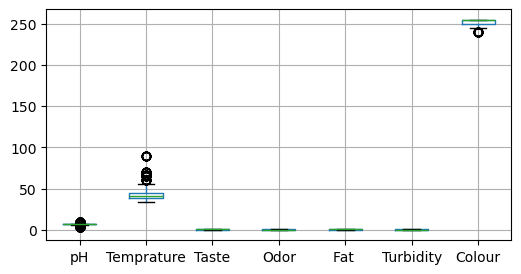

In [19]:
plt.figure(figsize=(6,3))
milkdata.boxplot()

Text(0.5, 1.0, 'Grade versus Colour')

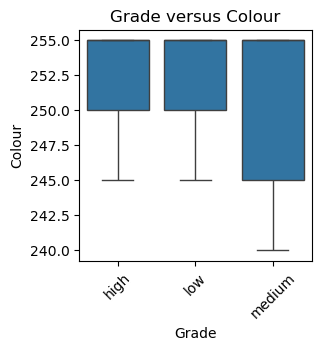

In [20]:
plt.figure(figsize = (3, 3))
ax = sns.boxplot(x='Grade', y='Colour', data=milkdata)
plt.setp(ax.artists, alpha=.6, linewidth=3, edgecolor="l")
plt.xticks(rotation=45)
plt.title('Grade versus Colour')

Text(0.5, 1.0, 'Grade versus Turbidity')

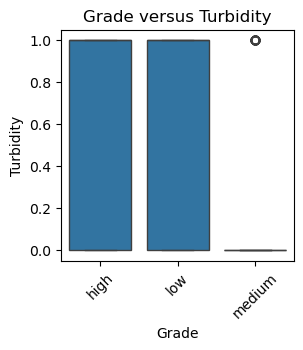

In [21]:
plt.figure(figsize = (3, 3))
ax = sns.boxplot(x='Grade', y='Turbidity', data=milkdata)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title('Grade versus Turbidity')

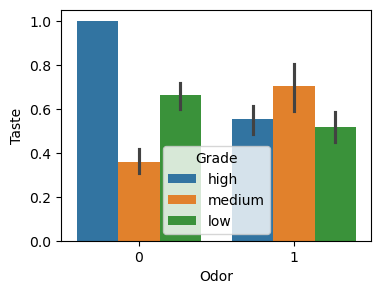

In [22]:
plt.figure(figsize=(4,3))
sns.barplot(x='Odor',y='Taste',hue='Grade',data=milkdata)
plt.show()

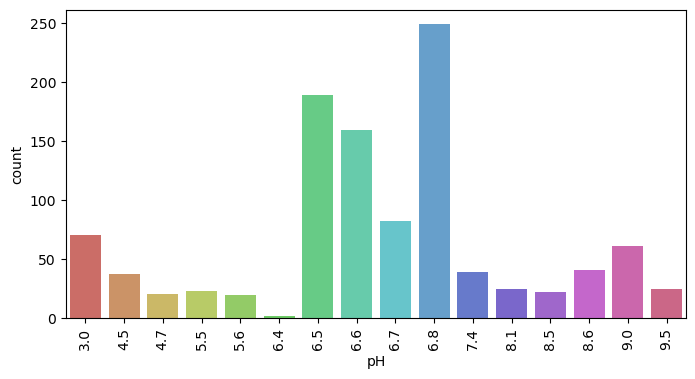

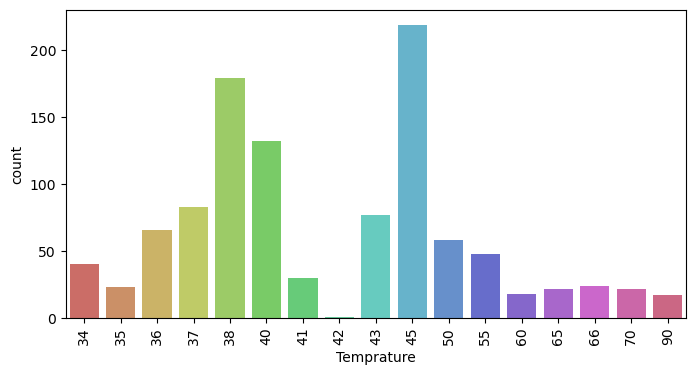

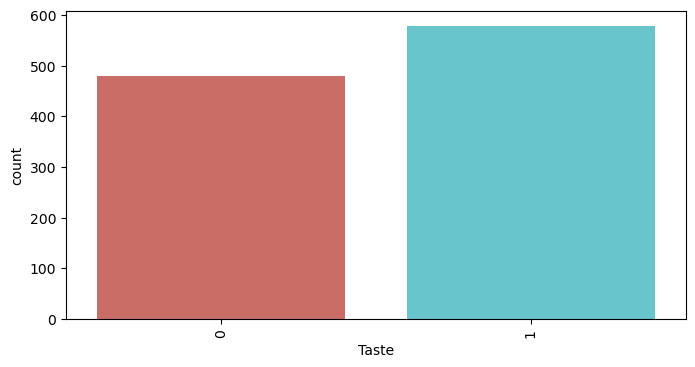

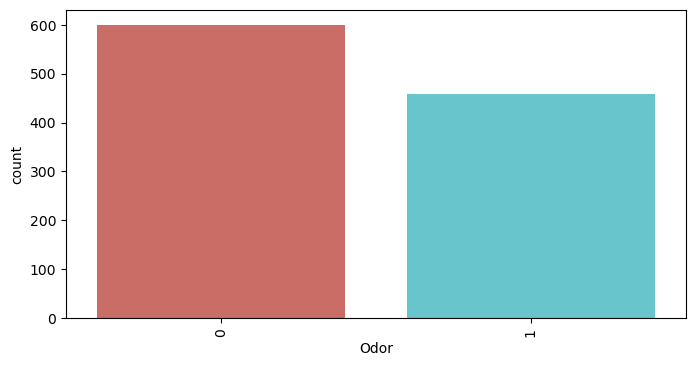

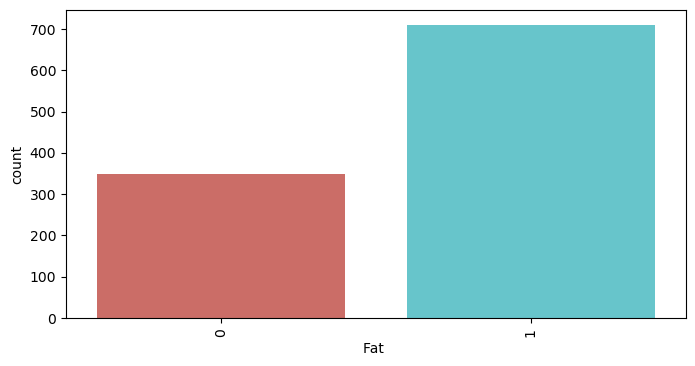

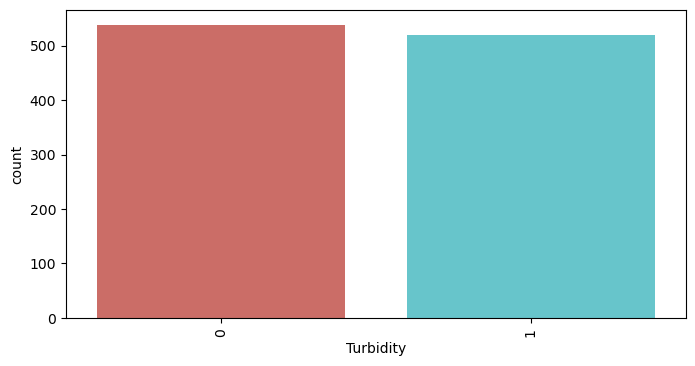

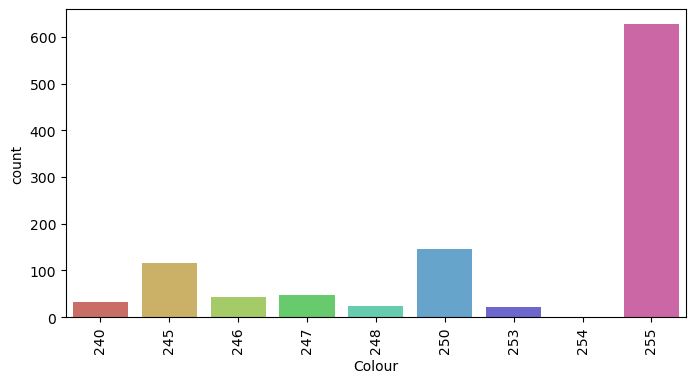

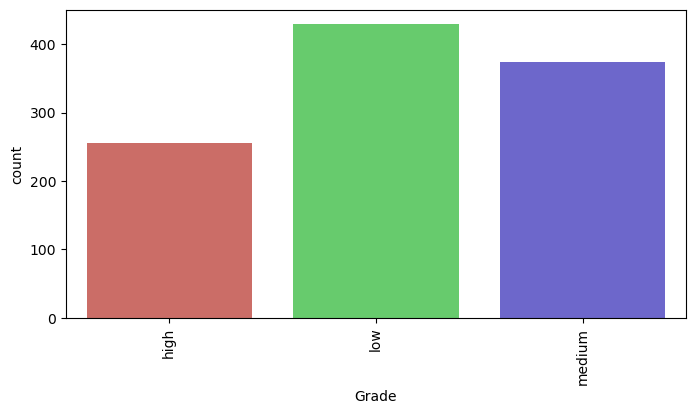

In [25]:
for i in milkdata.columns:
  plt.figure(figsize=(8,4))
  sns.countplot( x = milkdata[i], data = milkdata, palette = 'hls') 
  plt.xticks(rotation = 90)
  plt.show()

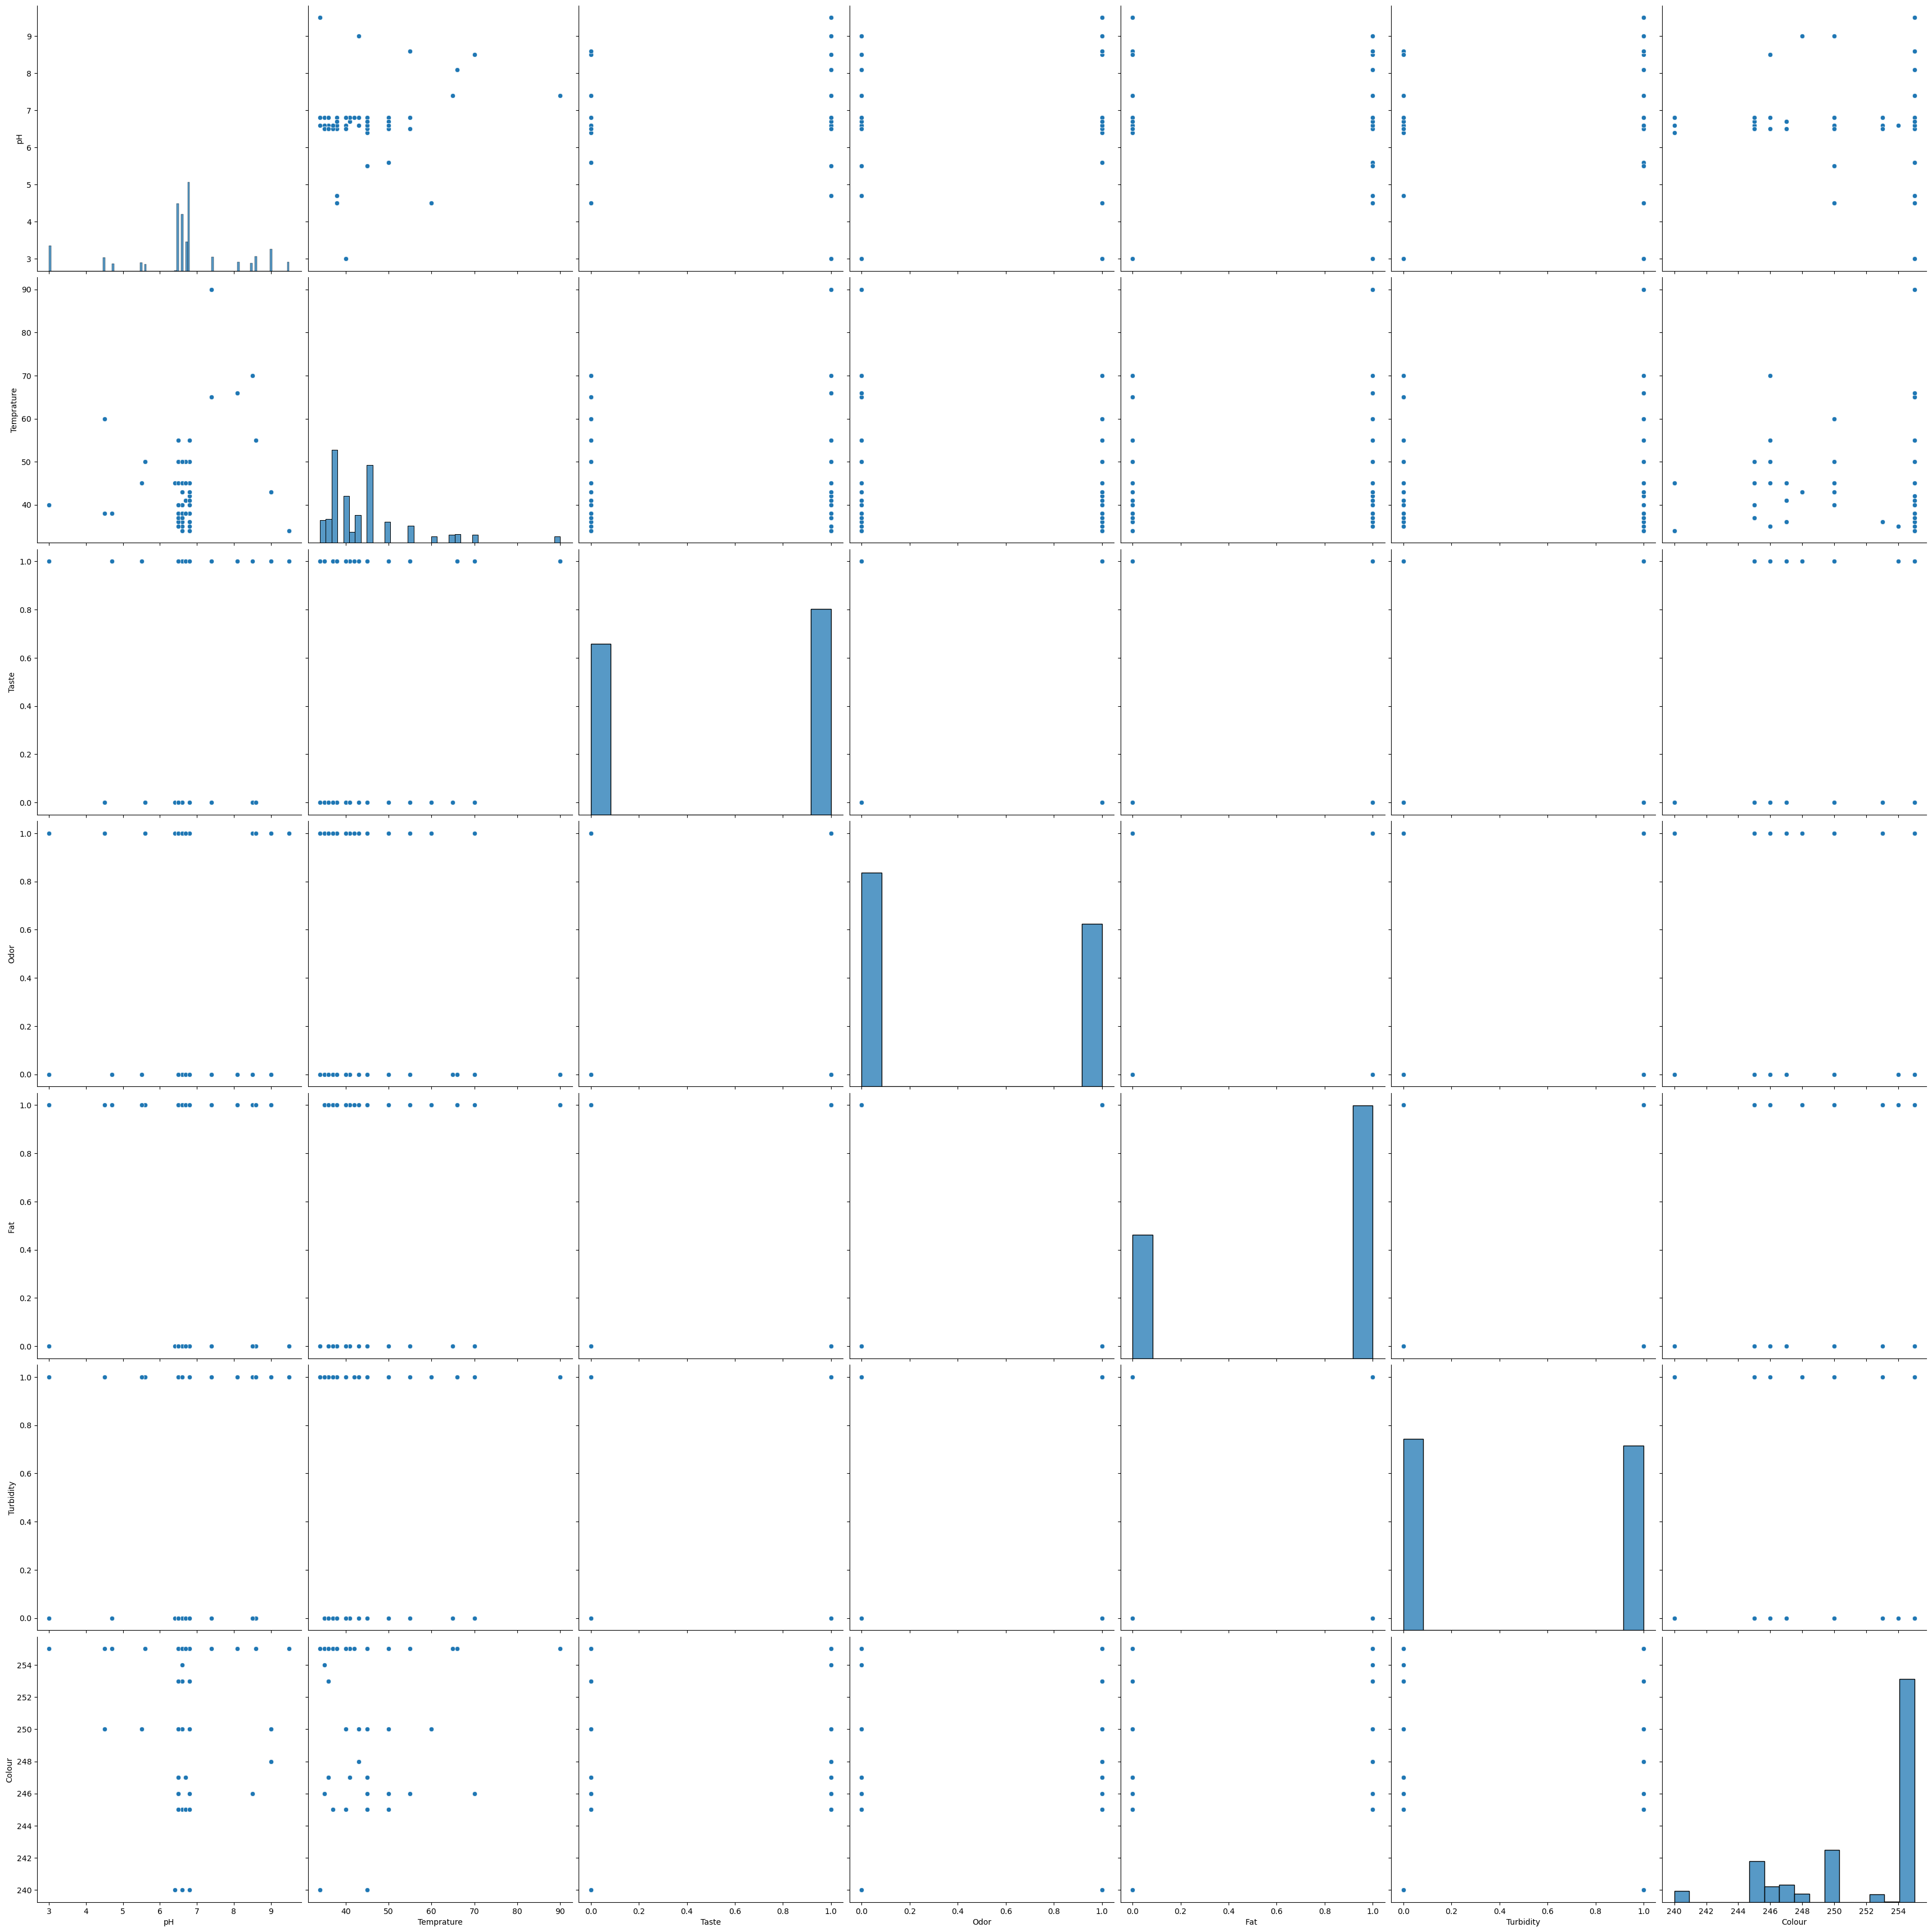

In [15]:
sns.pairplot(milkdata,height=5)

Text(0.5, 1.0, 'pH')

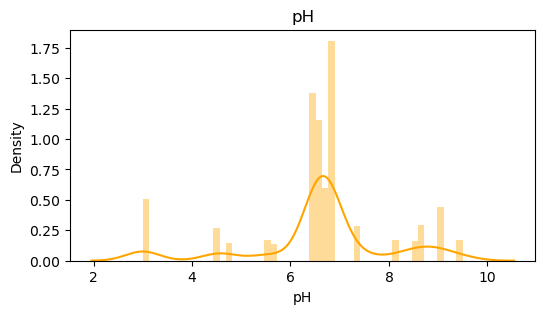

In [32]:
plt.figure(figsize=(6,3))
sns.distplot(milkdata['pH'], color="orange").set_title('pH')

Text(0.5, 1.0, 'Temprature')

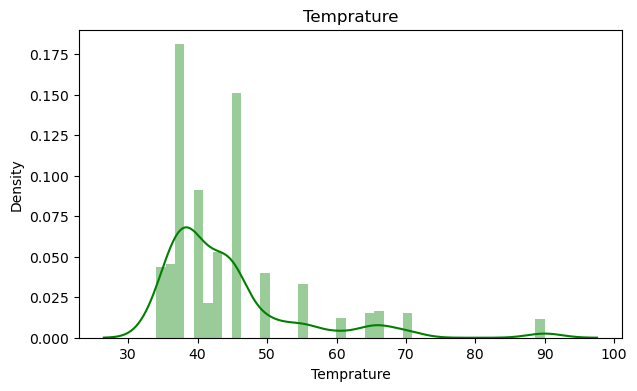

In [28]:
plt.figure(figsize=(6,3))
sns.distplot(milkdata['Temprature'], color="green").set_title('Temprature')

Text(0.5, 1.0, 'Colour')

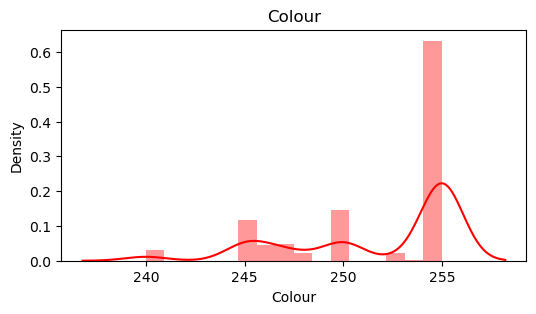

In [33]:
plt.figure(figsize=(6,3))
sns.distplot(milkdata['Colour'], color="red").set_title('Colour')

<Axes: title={'center': 'Taste'}, ylabel='count'>

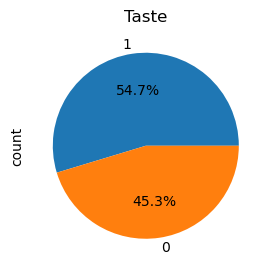

In [34]:
plt.figure(1, figsize=(3,4))
plt.title("Taste")
milkdata['Taste'].value_counts().plot.pie(autopct="%1.1f%%")

Text(0.5, 1.0, 'Taste')

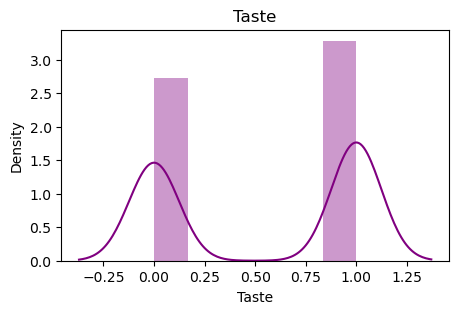

In [36]:
plt.figure(figsize=(5,3))
sns.distplot(milkdata['Taste'], color="purple").set_title('Taste')

<Axes: title={'center': 'Odor'}, ylabel='count'>

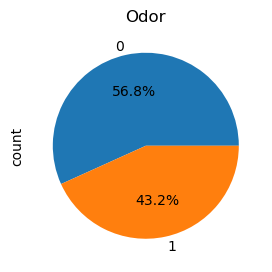

In [37]:
plt.figure(1, figsize=(3,4))
plt.title("Odor")
milkdata['Odor'].value_counts().plot.pie(autopct="%1.1f%%")

Text(0.5, 1.0, 'Odor')

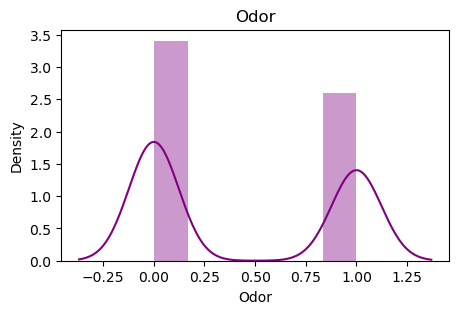

In [38]:
plt.figure(figsize=(5,3))
sns.distplot(milkdata['Odor'], color="purple").set_title('Odor')

<Axes: title={'center': 'Fat'}, ylabel='count'>

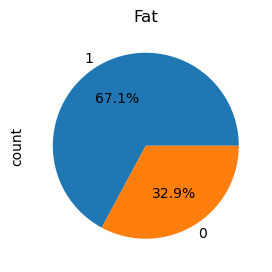

In [39]:
plt.figure(1, figsize=(3,4))
plt.title("Fat")
milkdata['Fat'].value_counts().plot.pie(autopct="%1.1f%%")

Text(0.5, 1.0, 'Fat')

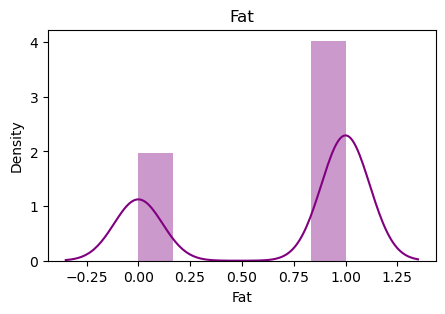

In [40]:
plt.figure(figsize=(5,3))
sns.distplot(milkdata['Fat'], color="purple").set_title('Fat')

<Axes: title={'center': 'Turbidity'}, ylabel='count'>

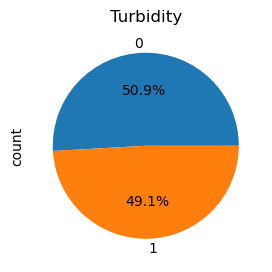

In [41]:
plt.figure(1, figsize=(3,4))
plt.title("Turbidity")
milkdata['Turbidity'].value_counts().plot.pie(autopct="%1.1f%%")

Text(0.5, 1.0, 'Fat')

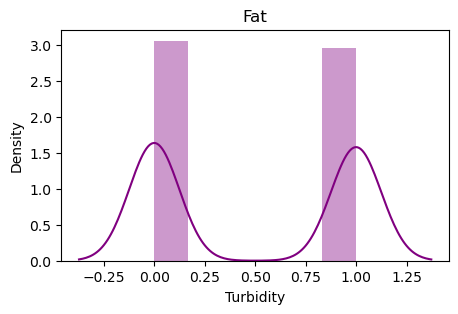

In [42]:
plt.figure(figsize=(5,3))
sns.distplot(milkdata['Turbidity'], color="purple").set_title('Fat')

<Axes: title={'center': 'Grade'}, ylabel='count'>

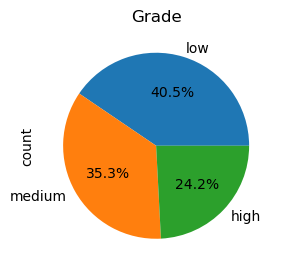

In [43]:
plt.figure(1, figsize=(3,4))
plt.title("Grade")
milkdata['Grade'].value_counts().plot.pie(autopct="%1.1f%%")

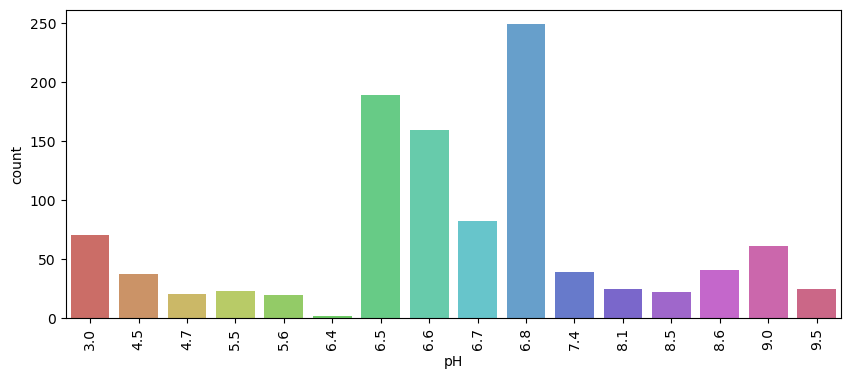

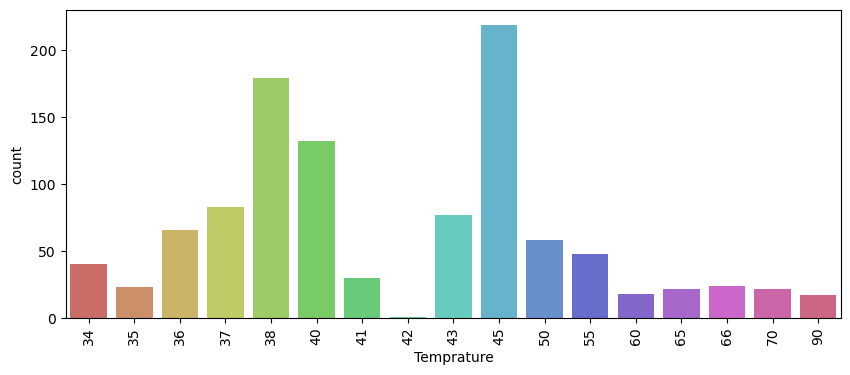

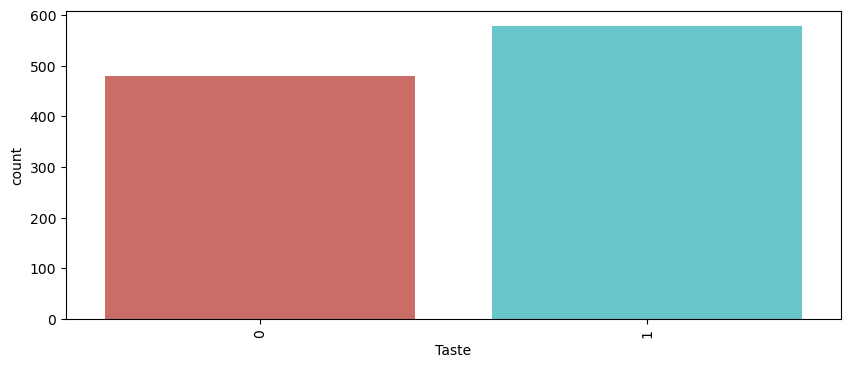

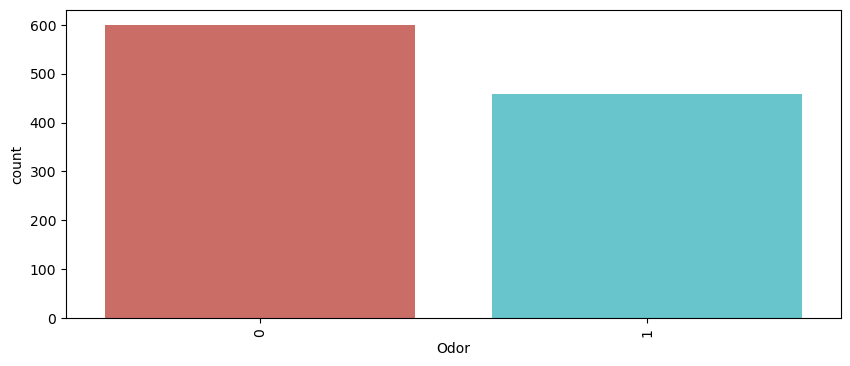

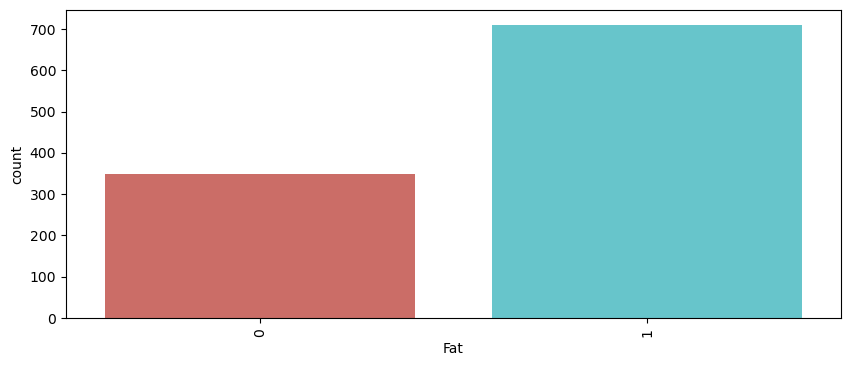

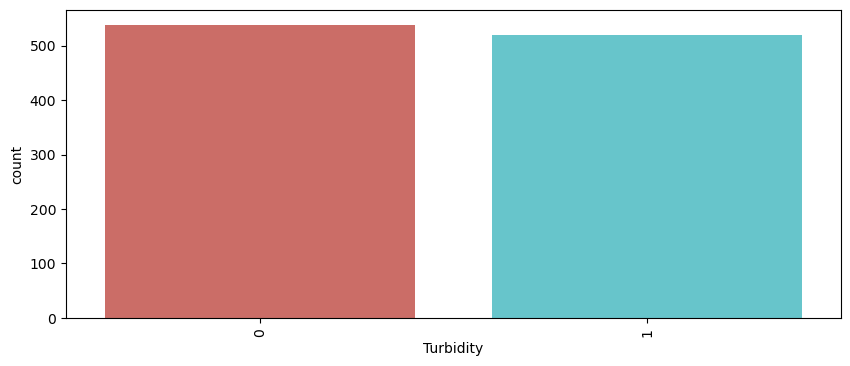

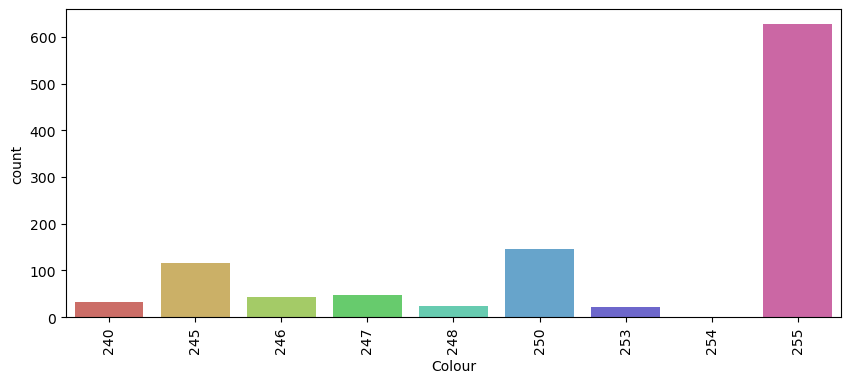

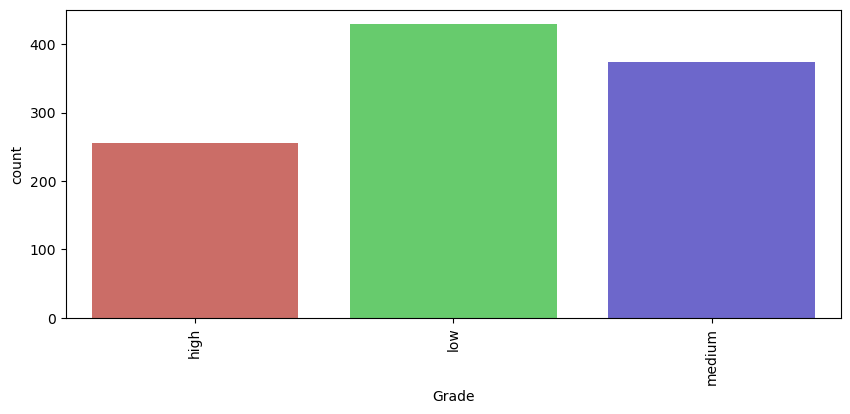

In [44]:
for i in milkdata.columns:
    plt.figure(figsize=(10,4))
    sns.countplot( x = milkdata[i], data = milkdata, palette = 'hls') 
    plt.xticks(rotation = 90)
    plt.show()

Features with continous range & Milk Quality[Grade]

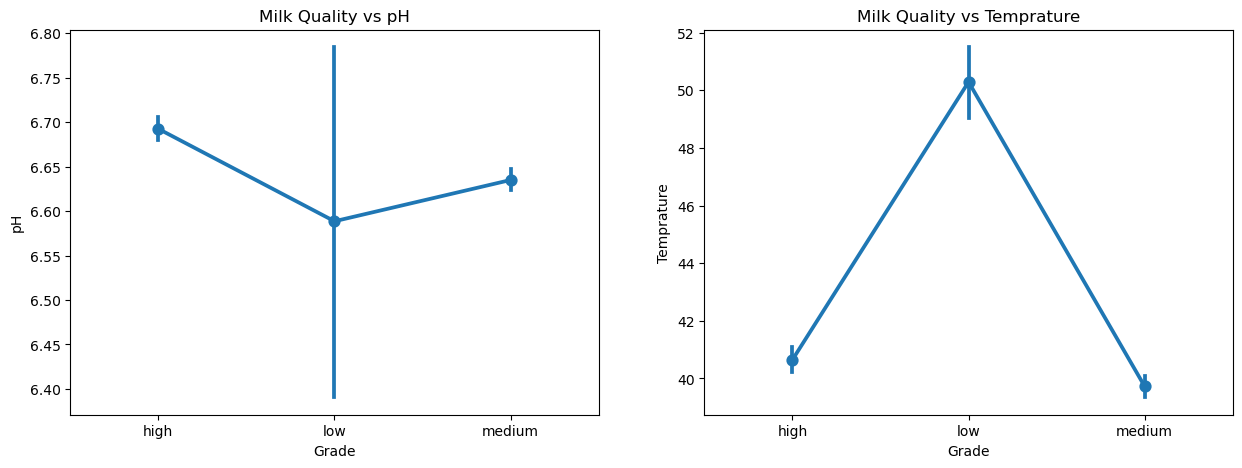

In [45]:
ContinousColumns = ['pH', 'Temprature']

fig = plt.figure(figsize=(15,5))

for i in range(len(ContinousColumns)):
    plt.subplot(1,2,i+1)
    plt.title("Milk Quality vs " + ContinousColumns[i])
    sns.pointplot(data=milkdata,y=milkdata[ContinousColumns[i]],x=milkdata['Grade'])

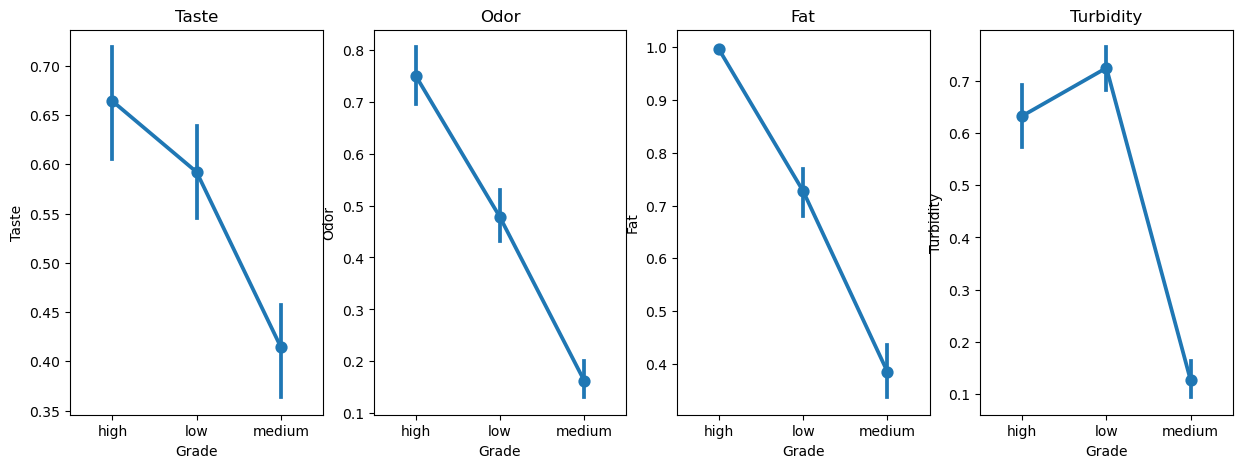

In [46]:
CategoricalColumns=['Taste', 'Odor', 'Fat', 'Turbidity']

fig = plt.figure(figsize=(15,5))

for i in range(len(CategoricalColumns)):
    plt.subplot(1,4,i+1)
    plt.title(CategoricalColumns[i])
    sns.pointplot(data=milkdata,y=milkdata[CategoricalColumns[i]],x=milkdata['Grade'])

In [26]:
milkdata.rename(columns=lambda x: x.strip(), inplace = True) #to remove any spaces

## Data Pre Processing

In [47]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
milkdata['Grade']= label_encoder.fit_transform(milkdata['Grade'])
  
milkdata['Grade'].unique()

array([0, 1, 2])

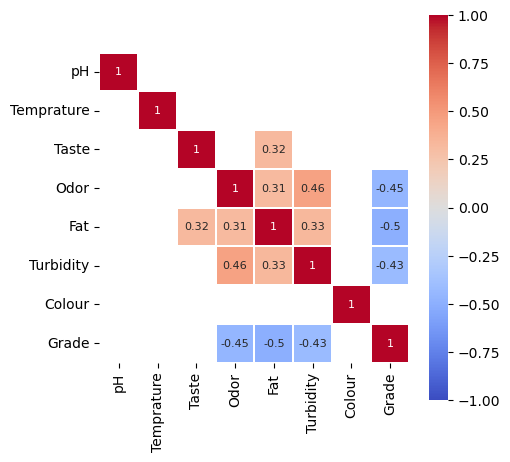

In [48]:
corr = milkdata.corr() 
plt.figure(figsize=(5, 5))

sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True);

In [50]:
X = milkdata[['pH', 'Temprature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour']]
y = milkdata[['Grade']]

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X =scaler.fit_transform(X)
print(X.min())
print(X.max())
X

0.0
1.0


array([[0.55384615, 0.01785714, 1.        , ..., 1.        , 0.        ,
        0.93333333],
       [0.55384615, 0.03571429, 0.        , ..., 0.        , 1.        ,
        0.86666667],
       [0.84615385, 0.64285714, 1.        , ..., 1.        , 1.        ,
        0.4       ],
       ...,
       [0.        , 0.10714286, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.58461538, 0.16071429, 1.        , ..., 1.        , 0.        ,
        0.66666667],
       [0.86153846, 0.375     , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [53]:
### Sandardization of data ###
### We does not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and Testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

b

(741, 7)
(741, 1)
(318, 7)
(318, 1)


In [55]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

## Model Building

### Decision tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Membuat dan melatih model Decision Tree
dtmodel = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

# Melakukan prediksi
dt_predictions = dtmodel.predict(X_test)

# Membuat confusion matrix
coma = confusion_matrix(y_test, dt_predictions)

# Menghitung akurasi
score = accuracy_score(y_test, dt_predictions)

# Memanggil output
print("Confusion Matrix:")
print(coma)
print("\nAccuracy Score:")
print(score)


Confusion Matrix:
[[  0   0  76]
 [  0  87  28]
 [  0   0 127]]

Accuracy Score:
0.6729559748427673


### Support Vector Machine

In [57]:
# SVM classifier
from sklearn.svm import SVC

# Melatih model SVM dengan kernel linear
svm_model_linear = SVC(kernel='linear', C=1).fit(X_train, y_train)

# Melakukan prediksi
svm_predictions = svm_model_linear.predict(X_test)

# Menghitung akurasi model untuk X_test
accuracy = svm_model_linear.score(X_test, y_test)

# Membuat confusion matrix
coma = confusion_matrix(y_test, svm_predictions)

# Memanggil output
print("Confusion Matrix:")
print(coma)
print("\nAccuracy Score:")
print(accuracy)


Confusion Matrix:
[[ 70   3   3]
 [ 15  98   2]
 [ 14   8 105]]

Accuracy Score:
0.8584905660377359


### KNN

In [58]:
# Melatih model KNN dengan 7 tetangga terdekat
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)

# Menghitung akurasi model untuk X_test
accuracy = knn.score(X_test, y_test)

# Membuat confusion matrix
knn_predictions = knn.predict(X_test)
coma = confusion_matrix(y_test, knn_predictions)


print("\nConfusion Matrix:")
print(coma)
print("Accuracy Score:")
print(accuracy)



Confusion Matrix:
[[ 69   0   7]
 [  1 112   2]
 [  0   0 127]]
Accuracy Score:
0.9685534591194969


### Naive Baiyes

In [59]:
# Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# Melatih model Naive Bayes
nb = GaussianNB().fit(X_train, y_train)

# Melakukan prediksi
nb_predictions = nb.predict(X_test)

# Menghitung akurasi model untuk X_test
accuracy = nb.score(X_test, y_test)

# Membuat confusion matrix
coma = confusion_matrix(y_test, nb_predictions)

print("\nConfusion Matrix:")
print(coma)
print("Accuracy Score:")
print(accuracy)



Confusion Matrix:
[[ 64   0  12]
 [  5 108   2]
 [  5   7 115]]
Accuracy Score:
0.9025157232704403


### Simple Predictions

In [24]:
# Data baru yang ingin diprediksi 
new_data = [[9, 1.5, 0, 0, 0, 0, 90]]  # Gantilah dengan data yang sesuai

# Melakukan prediksi dengan model KNN
new_prediction = dtmodel.predict(new_data)

print("Prediksi Kualitas Susu:", new_prediction[0])

Prediksi Kualitas Susu: 1


In [62]:
predictions1 = nb.predict(np.array([[0,0,0,1,3,0,20]]))
predictions1

array([2])

In [63]:
from sklearn.model_selection import GridSearchCV

# Contoh untuk model Decision Tree
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 8, 'min_samples_split': 2}


In [64]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeClassifier(max_depth=4), X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.90604027 0.87837838 0.89189189 0.90540541 0.91891892]
Mean accuracy: 0.9001269726101941
